In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
!pip install tensorflow


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
pip install pillow

In [ ]:
!pip install pillow

In [ ]:
import scipy


In [ ]:
import scipy

In [ ]:
from scipy import your_module_or_function

In [ ]:
pip install scipy

In [ ]:
!pip install scipy

In [ ]:
import scipy

In [6]:
from tensorflow.keras.utils import to_categorical

In [8]:
from tensorflow.keras.utils import to_categorical

In [12]:
from tensorflow.keras.preprocessing import image

Found 1125 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Epoch 1/100
36/36 [==============================] - 166s 5s/step - loss: 1.1015 - accuracy: 0.5502 - val_loss: 0.6851 - val_accuracy: 0.7688
Epoch 2/100
36/36 [==============================] - 160s 4s/step - loss: 0.4672 - accuracy: 0.8693 - val_loss: 0.5400 - val_accuracy: 0.7912
Epoch 3/100
36/36 [==============================] - 161s 5s/step - loss: 0.3281 - accuracy: 0.9058 - val_loss: 0.4943 - val_accuracy: 0.8163
Epoch 4/100
36/36 [==============================] - 161s 5s/step - loss: 0.2786 - accuracy: 0.9138 - val_loss: 0.4234 - val_accuracy: 0.8425
Epoch 5/100
36/36 [==============================] - 159s 4s/step - loss: 0.2420 - accuracy: 0.9262 - val_loss: 0.4051 - val_accuracy: 0.8438
Epoch 6/100
36/36 [==============================] - 160s 4s/step - loss: 0.2102 - accuracy: 0.9449 - val_loss: 0.3806 - val_accuracy: 0.8600
Epoch 7/100
36/36 [==============================] - 159s 5s/step

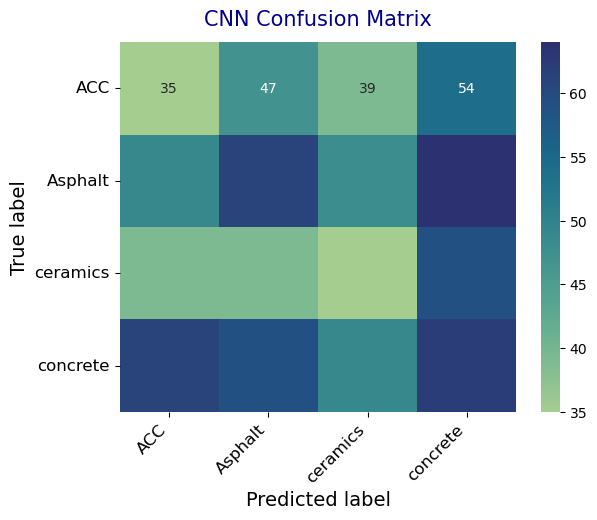

Classification Report
              precision    recall  f1-score   support

         ACC       0.19      0.20      0.19       175
     Asphalt       0.30      0.27      0.29       222
    ceramics       0.20      0.20      0.20       172
    concrete       0.26      0.27      0.26       231

    accuracy                           0.24       800
   macro avg       0.24      0.24      0.24       800
weighted avg       0.24      0.24      0.24       800

ACC: True Positives = 35, False Negatives = 140
Asphalt: True Positives = 61, False Negatives = 161
ceramics: True Positives = 35, False Negatives = 137
concrete: True Positives = 62, False Negatives = 169
F-beta Score (beta=0.5): 0.2413


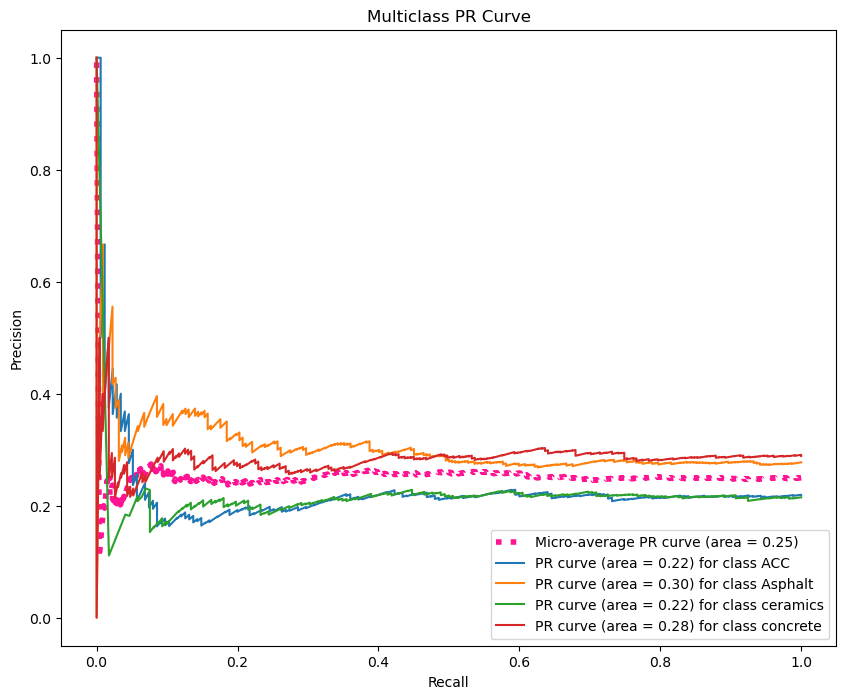

In [25]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import label_binarize

def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Specify the paths to your dataset
train_data_dir = '/Users/asma/Desktop/T/Training'
test_data_dir = '/Users/asma/Desktop/T/Test'

# Image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

img_height = 224
img_width = 224
batch_size = 32

# Flow training images in batches of batch_size using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Flow validation images in batches of batch_size using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Get the class labels from the training generator
class_labels = list(train_generator.class_indices.keys())

# Create MobileNetV2 base model with specified input shape
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Build the classification head
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(len(class_labels), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=100, validation_data=test_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')
print(f'Test Error Rate: {1 - test_acc:.2%}')

# Function to predict waste material
def predict_waste_material(image_path):
    img = preprocess_image(image_path, target_size=(img_height, img_width))
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions[0])
    predicted_label = class_labels[predicted_class]
    probabilities = predictions[0]
    print(f'Predicted Label: {predicted_label}')
    print(f'Probabilities: {probabilities}')
    return predicted_label, probabilities

# Example usage:
image_path = '/Users/asma/Desktop/T/Test/Asphalt/IMG_0007 (2).JPG'
predicted_label, probabilities = predict_waste_material(image_path)

# Confusion matrix
Y_test = model.predict(test_generator)
y_test_pred = np.argmax(Y_test, axis=1)
y_test_true = test_generator.classes

cm = confusion_matrix(y_test_true, y_test_pred)

# Visualize confusion matrix
matrix = pd.DataFrame(cm, index=class_labels, columns=class_labels)
heatmap = sns.heatmap(matrix, annot=True, fmt='d', cmap='crest', cbar=True)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
plt.title('CNN Confusion Matrix', fontsize=15, pad=12, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# Classification report
print('Classification Report')
print(classification_report(y_test_true, y_test_pred, target_names=class_labels, zero_division=0))

# Calculate True Positives (TP) and False Negatives (FN)
TP = np.diag(cm)
FN = np.sum(cm, axis=1) - TP

# Display TP and FN measures
for i, class_name in enumerate(class_labels):

    print(f'{class_name}: True Positives = {TP[i]}, False Negatives = {FN[i]}')

# F-beta Score
beta = 0.5  # Example: F-beta score with more emphasis on precision
y_test_one_hot = label_binarize(y_test_true, classes=range(len(class_labels)))
y_test_pred_one_hot = label_binarize(y_test_pred, classes=range(len(class_labels)))
f_beta = metrics.fbeta_score(y_test_one_hot, y_test_pred_one_hot, beta=beta, average='micro')
print(f"F-beta Score (beta={beta}): {f_beta:.4f}")

# PR Curve and AUC-PR
precision = dict()
recall = dict()
auc_pr = dict()

for i in range(len(class_labels)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_one_hot[:, i], Y_test[:, i])
    auc_pr[i] = auc(recall[i], precision[i])

precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_one_hot.ravel(), Y_test.ravel())
auc_pr["micro"] = auc(recall["micro"], precision["micro"])

plt.figure(figsize=(10, 8))
plt.plot(recall["micro"], precision["micro"], label=f'Micro-average PR curve (area = {auc_pr["micro"]:.2f})', color='deeppink', linestyle=':', linewidth=4)

for i in range(len(class_labels)):
    plt.plot(recall[i], precision[i], label=f'PR curve (area = {auc_pr[i]:.2f}) for class {class_labels[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass PR Curve')
plt.legend(loc="lower right")
plt.show()



Found 6491 images belonging to 4 classes.
Found 2782 images belonging to 4 classes.
Epoch 1/100
203/203 [==============================] - 548s 3s/step - loss: 0.5164 - accuracy: 0.8113 - val_loss: 0.2758 - val_accuracy: 0.9094
Epoch 2/100
203/203 [==============================] - 540s 3s/step - loss: 0.2484 - accuracy: 0.9183 - val_loss: 0.2048 - val_accuracy: 0.9303
Epoch 3/100
203/203 [==============================] - 540s 3s/step - loss: 0.2025 - accuracy: 0.9351 - val_loss: 0.1959 - val_accuracy: 0.9310
Epoch 4/100
203/203 [==============================] - 540s 3s/step - loss: 0.1783 - accuracy: 0.9393 - val_loss: 0.1836 - val_accuracy: 0.9313
Epoch 5/100
203/203 [==============================] - 543s 3s/step - loss: 0.1614 - accuracy: 0.9458 - val_loss: 0.1974 - val_accuracy: 0.9285
Epoch 6/100
203/203 [==============================] - 540s 3s/step - loss: 0.1535 - accuracy: 0.9468 - val_loss: 0.2023 - val_accuracy: 0.9202
Epoch 7/100
203/203 [==============================]

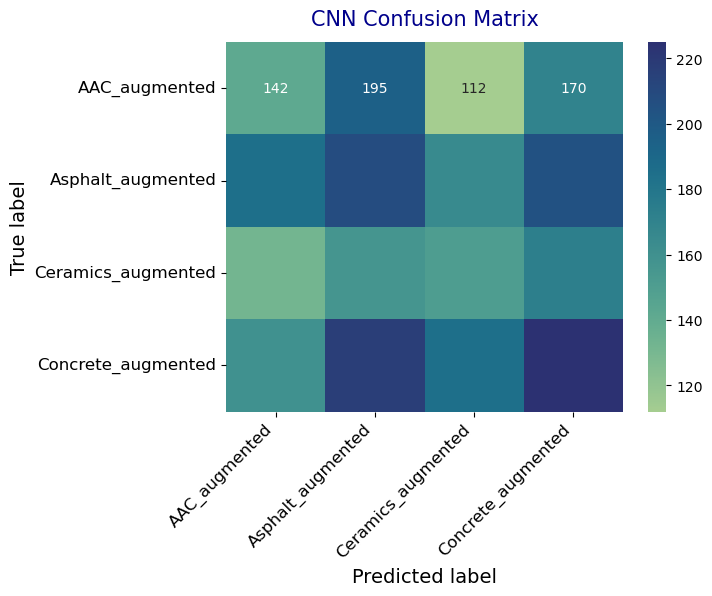

Classification Report
                    precision    recall  f1-score   support

     AAC_augmented       0.23      0.23      0.23       619
 Asphalt_augmented       0.27      0.27      0.27       763
Ceramics_augmented       0.25      0.25      0.25       613
Concrete_augmented       0.29      0.29      0.29       787

          accuracy                           0.26      2782
         macro avg       0.26      0.26      0.26      2782
      weighted avg       0.26      0.26      0.26      2782

AAC_augmented: True Positives = 142, False Negatives = 477
Asphalt_augmented: True Positives = 208, False Negatives = 555
Ceramics_augmented: True Positives = 151, False Negatives = 462
Concrete_augmented: True Positives = 225, False Negatives = 562
F-beta Score (beta=0.5): 0.2610


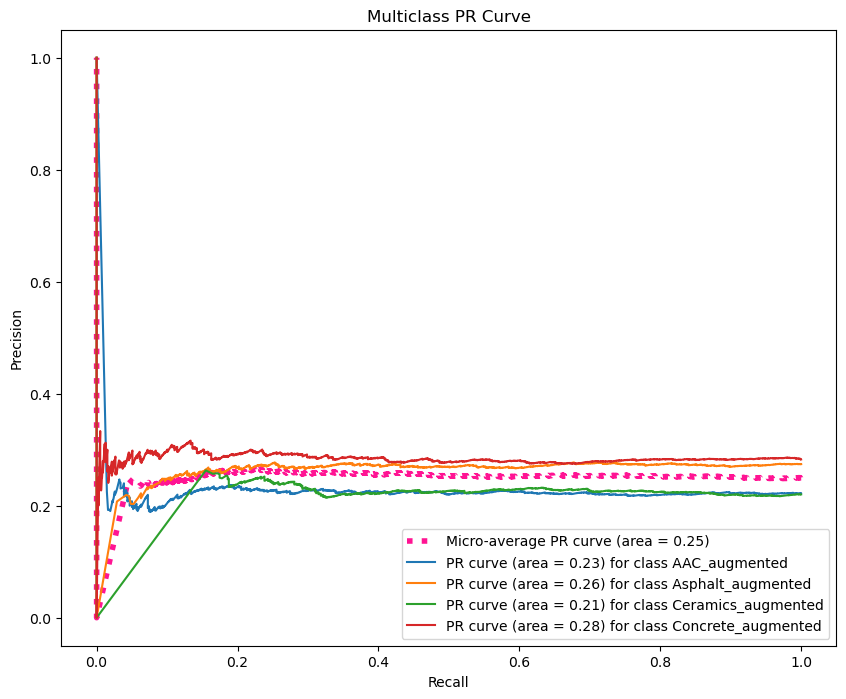

In [4]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import label_binarize

def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Specify the paths to your dataset
train_data_dir = '/Users/asma/Desktop/Dataset/Train'
test_data_dir = '/Users/asma/Desktop/Dataset/Test'

# Image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

img_height = 224
img_width = 224
batch_size = 32

# Flow training images in batches of batch_size using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Flow validation images in batches of batch_size using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Get the class labels from the training generator
class_labels = list(train_generator.class_indices.keys())

# Create MobileNetV2 base model with specified input shape
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Build the classification head
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(len(class_labels), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=100, validation_data=test_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')
print(f'Test Error Rate: {1 - test_acc:.2%}')

# Function to predict waste material
def predict_waste_material(image_path):
    img = preprocess_image(image_path, target_size=(img_height, img_width))
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions[0])
    predicted_label = class_labels[predicted_class]
    probabilities = predictions[0]
    print(f'Predicted Label: {predicted_label}')
    print(f'Probabilities: {probabilities}')
    return predicted_label, probabilities

# Example usage:
image_path = '/Users/asma/Desktop/Dataset/Test/Ceramics/aug_0_3588.jpg'
predicted_label, probabilities = predict_waste_material(image_path)

# Confusion matrix
Y_test = model.predict(test_generator)
y_test_pred = np.argmax(Y_test, axis=1)
y_test_true = test_generator.classes

cm = confusion_matrix(y_test_true, y_test_pred)

# Visualize confusion matrix
matrix = pd.DataFrame(cm, index=class_labels, columns=class_labels)
heatmap = sns.heatmap(matrix, annot=True, fmt='d', cmap='crest', cbar=True)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
plt.title('CNN Confusion Matrix', fontsize=15, pad=12, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# Classification report
print('Classification Report')
print(classification_report(y_test_true, y_test_pred, target_names=class_labels, zero_division=0))

# Calculate True Positives (TP) and False Negatives (FN)
TP = np.diag(cm)
FN = np.sum(cm, axis=1) - TP

# Display TP and FN measures
for i, class_name in enumerate(class_labels):

    print(f'{class_name}: True Positives = {TP[i]}, False Negatives = {FN[i]}')

# F-beta Score
beta = 0.5  # Example: F-beta score with more emphasis on precision
y_test_one_hot = label_binarize(y_test_true, classes=range(len(class_labels)))
y_test_pred_one_hot = label_binarize(y_test_pred, classes=range(len(class_labels)))
f_beta = metrics.fbeta_score(y_test_one_hot, y_test_pred_one_hot, beta=beta, average='micro')
print(f"F-beta Score (beta={beta}): {f_beta:.4f}")

# PR Curve and AUC-PR
precision = dict()
recall = dict()
auc_pr = dict()

for i in range(len(class_labels)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_one_hot[:, i], Y_test[:, i])
    auc_pr[i] = auc(recall[i], precision[i])

precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_one_hot.ravel(), Y_test.ravel())
auc_pr["micro"] = auc(recall["micro"], precision["micro"])

plt.figure(figsize=(10, 8))
plt.plot(recall["micro"], precision["micro"], label=f'Micro-average PR curve (area = {auc_pr["micro"]:.2f})', color='deeppink', linestyle=':', linewidth=4)

for i in range(len(class_labels)):
    plt.plot(recall[i], precision[i], label=f'PR curve (area = {auc_pr[i]:.2f}) for class {class_labels[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass PR Curve')
plt.legend(loc="lower right")
plt.show()


2024-03-29 20:27:24.475159: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 7418 images belonging to 4 classes.
Found 1855 images belonging to 4 classes.
Epoch 1/100
232/232 [==============================] - 566s 2s/step - loss: 0.4755 - accuracy: 0.8264 - val_loss: 0.2627 - val_accuracy: 0.9078
Epoch 2/100
232/232 [==============================] - 565s 2s/step - loss: 0.2362 - accuracy: 0.9201 - val_loss: 0.2305 - val_accuracy: 0.9154
Epoch 3/100
232/232 [==============================] - 561s 2s/step - loss: 0.1905 - accuracy: 0.9357 - val_loss: 0.1750 - val_accuracy: 0.9364
Epoch 4/100
232/232 [==============================] - 562s 2s/step - loss: 0.1643 - accuracy: 0.9469 - val_loss: 0.1887 - val_accuracy: 0.9272
Epoch 5/100
232/232 [==============================] - 563s 2s/step - loss: 0.1476 - accuracy: 0.9474 - val_loss: 0.1549 - val_accuracy: 0.9418
Epoch 6/100
232/232 [==============================] - 567s 2s/step - loss: 0.1441 - accuracy: 0.9485 - val_loss: 0.1365 - val_accuracy: 0.9499
Epoch 7/100
232/232 [==============================]

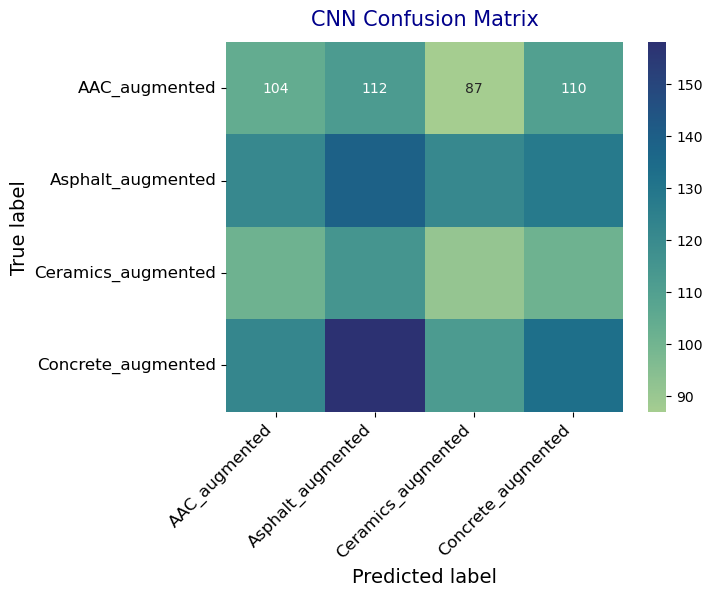

Classification Report
                    precision    recall  f1-score   support

     AAC_augmented       0.23      0.25      0.24       413
 Asphalt_augmented       0.27      0.27      0.27       509
Ceramics_augmented       0.22      0.22      0.22       408
Concrete_augmented       0.28      0.25      0.27       525

          accuracy                           0.25      1855
         macro avg       0.25      0.25      0.25      1855
      weighted avg       0.25      0.25      0.25      1855

AAC_augmented: True Positives = 104, False Negatives = 309
Asphalt_augmented: True Positives = 139, False Negatives = 370
Ceramics_augmented: True Positives = 91, False Negatives = 317
Concrete_augmented: True Positives = 133, False Negatives = 392
F-beta Score (beta=0.5): 0.2518


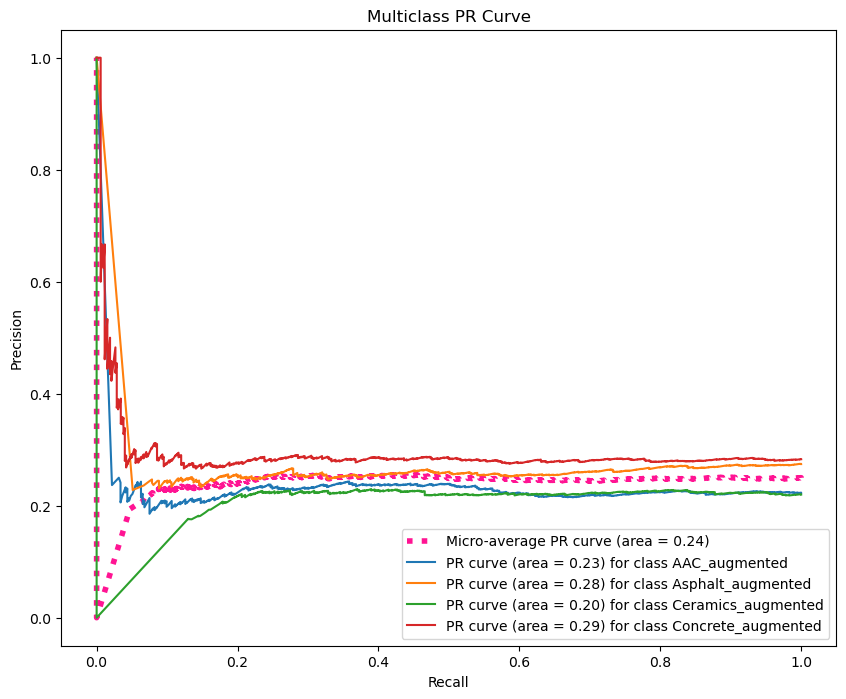

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import label_binarize

def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Specify the paths to your dataset
train_data_dir = '/Users/asma/Desktop/20&-80%Dataset/Train'
test_data_dir = '/Users/asma/Desktop/20&-80%Dataset/Test'

# Image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

img_height = 224
img_width = 224
batch_size = 32

# Flow training images in batches of batch_size using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Flow validation images in batches of batch_size using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Get the class labels from the training generator
class_labels = list(train_generator.class_indices.keys())

# Create MobileNetV2 base model with specified input shape
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Build the classification head
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(len(class_labels), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=100, validation_data=test_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')
print(f'Test Error Rate: {1 - test_acc:.2%}')

# Function to predict waste material
def predict_waste_material(image_path):
    img = preprocess_image(image_path, target_size=(img_height, img_width))
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions[0])
    predicted_label = class_labels[predicted_class]
    probabilities = predictions[0]
    print(f'Predicted Label: {predicted_label}')
    print(f'Probabilities: {probabilities}')
    return predicted_label, probabilities

# Example usage:
image_path = '/Users/asma/Desktop/20&-80%Dataset/Test/Asphalt/aug_0_4344.jpg'
predicted_label, probabilities = predict_waste_material(image_path)

# Confusion matrix
Y_test = model.predict(test_generator)
y_test_pred = np.argmax(Y_test, axis=1)
y_test_true = test_generator.classes

cm = confusion_matrix(y_test_true, y_test_pred)

# Visualize confusion matrix
matrix = pd.DataFrame(cm, index=class_labels, columns=class_labels)
heatmap = sns.heatmap(matrix, annot=True, fmt='d', cmap='crest', cbar=True)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
plt.title('CNN Confusion Matrix', fontsize=15, pad=12, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# Classification report
print('Classification Report')
print(classification_report(y_test_true, y_test_pred, target_names=class_labels, zero_division=0))

# Calculate True Positives (TP) and False Negatives (FN)
TP = np.diag(cm)
FN = np.sum(cm, axis=1) - TP

# Display TP and FN measures
for i, class_name in enumerate(class_labels):

    print(f'{class_name}: True Positives = {TP[i]}, False Negatives = {FN[i]}')

# F-beta Score
beta = 0.5  # Example: F-beta score with more emphasis on precision
y_test_one_hot = label_binarize(y_test_true, classes=range(len(class_labels)))
y_test_pred_one_hot = label_binarize(y_test_pred, classes=range(len(class_labels)))
f_beta = metrics.fbeta_score(y_test_one_hot, y_test_pred_one_hot, beta=beta, average='micro')
print(f"F-beta Score (beta={beta}): {f_beta:.4f}")

# PR Curve and AUC-PR
precision = dict()
recall = dict()
auc_pr = dict()

for i in range(len(class_labels)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_one_hot[:, i], Y_test[:, i])
    auc_pr[i] = auc(recall[i], precision[i])

precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_one_hot.ravel(), Y_test.ravel())
auc_pr["micro"] = auc(recall["micro"], precision["micro"])

plt.figure(figsize=(10, 8))
plt.plot(recall["micro"], precision["micro"], label=f'Micro-average PR curve (area = {auc_pr["micro"]:.2f})', color='deeppink', linestyle=':', linewidth=4)

for i in range(len(class_labels)):
    plt.plot(recall[i], precision[i], label=f'PR curve (area = {auc_pr[i]:.2f}) for class {class_labels[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass PR Curve')
plt.legend(loc="lower right")
plt.show()